Garbage in Garbage out:<br>
If we are feeding bad data to a good model then we will get bad output(accuracy)

If we are passing good data to poor model then it will give comparitively good output(accuracy)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
ROOT = "/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp-2.0/Regression"
os.chdir(ROOT)
os.getcwd()

'/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp-2.0/Regression'

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
X = pd.DataFrame(housing.data, columns= housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y = pd.DataFrame(housing.target, columns=['target'])
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
X.shape

(20640, 8)

In [ ]:
y.shape

(20640, 1)

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, random_state=42) #Using X_train full making the validation split

In [ ]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 8)
(5160, 8)
(11610, 8)
(3870, 8)


In [ ]:
## Here we don't need to flatten the data before passing to the input layer since here data is already in 1D

## Below, X_train.shape=(11610,2) and when idexing (11610,2)[1:] will give (8,) as the output which represents 1D representation where
## each record is having 8 enteries(features) that are feeded to hidden layer 1

LAYERS = [
         tf.keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),   ## Here by mentioning the input_shape
                                                                                        ## we are indirectly basically defining the input layer.
                                                                                        ## Whereas, 30 represents the no. of nodes in hidden later 1
         tf.keras.layers.Dense(10, activation="relu"),
         tf.keras.layers.Dense(5, activation='relu'),
         tf.keras.layers.Dense(1)  ## Output layer where single node will be able to predict the respective regression value

]

In [ ]:
model = tf.keras.models.Sequential(LAYERS)

In [ ]:
# # For calculating accuracy score (r2 score)
# from keras import backend as K

## For regression we will be using performance matrix called coeff_determination fun^(user defined) which is a kind of r2 score since I
## there is no implementation of calculating the r2 score in the sklearn hence we are making one on our own using the formula

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[coeff_determination]) ##This is how we can pass a user defined metric

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


## Interesting fact

When we are solving regression using linear regression then there were only 2 trainable parameters m and c. Whereas, using ANN for the same will increase trainable parameters. So, for learning this is fine but when moving such ANN based model to the production then our cost will increase. So better not to consider such model in production deployment.


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)  #based on scaling learned using train data we are applying that learning to both validation and test data splits
X_test = scaler.transform(X_test)


In [ ]:
EPOCHS = 5

history = model.fit( X_train, y_train, epochs= EPOCHS, validation_data=(X_valid, y_valid))


Epoch 1/5
363/363 [==============================] - 7s 5ms/step - loss: 0.6732 - coeff_determination: 0.4680 - val_loss: 0.4322 - val_coeff_determination: 0.6496
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.4343 - coeff_determination: 0.6579 - val_loss: 0.3876 - val_coeff_determination: 0.6835
Epoch 3/5
363/363 [==============================] - 2s 4ms/step - loss: 0.4048 - coeff_determination: 0.6744 - val_loss: 0.3837 - val_coeff_determination: 0.6869
Epoch 4/5
363/363 [==============================] - 2s 4ms/step - loss: 0.3971 - coeff_determination: 0.6814 - val_loss: 0.3625 - val_coeff_determination: 0.7043
Epoch 5/5
363/363 [==============================] - 2s 4ms/step - loss: 0.3805 - coeff_determination: 0.6985 - val_loss: 0.3546 - val_coeff_determination: 0.7071


In [ ]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,0.673207,0.467984,0.432201,0.649625
1,0.434267,0.657927,0.387608,0.683546
2,0.404842,0.674409,0.383741,0.686871
3,0.397080,0.681414,0.362521,0.704309
4,0.380457,0.698457,0.354608,0.707111


<Axes: >

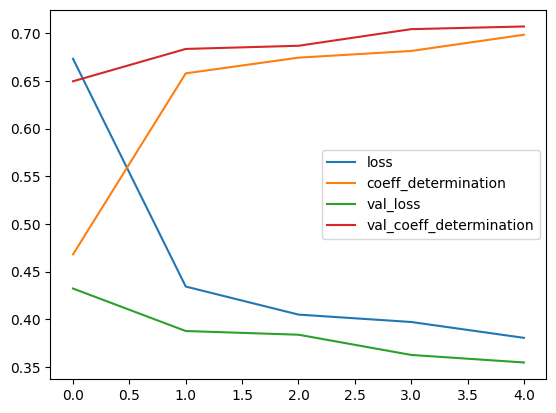

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

## Evaluate returns 2 elements.
## 1st represents loss
## 2nd represents accuracy

162/162 [==============================] - 0s 2ms/step - loss: 0.3707 - coeff_determination: 0.6961


[0.37068113684654236, 0.696096658706665]

In [ ]:
X_test.shape

(5160, 8)

In [ ]:
new = X_test[0] #1st record in the test split

In [ ]:
new  ##Observe that there are total 8 elements

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [ ]:
new.reshape((1,8))

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ]])

In [ ]:
model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 137ms/step


array([[0.86211264]], dtype=float32)